Data Preprocessing

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('ETH_1Y.csv', sep=';')

# Drop any rows with missing values
data.dropna(inplace=True)

# Separate features (X) and target variable (y)
X = data[['open', 'high', 'low', 'volume', 'marketCap']]
y = data['close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain standardized numerical features
# You can proceed with model training using these preprocessed features


In [70]:

data.head()


,name,open,high,low,close,volume,marketCap,timestamp
0,2781,1590.831187,1843.844108,1572.074653,1785.576582,8.590740e+10,2.185079e+11,2023-03-13T00:00:00.000Z
1,2781,1785.416296,1853.888003,1716.652035,1775.676750,6.975232e+10,2.172964e+11,2023-03-20T00:00:00.000Z
2,2781,1775.481331,1844.677377,1690.516585,1795.708092,5.669886e+10,2.163070e+11,2023-03-27T00:00:00.000Z
3,2781,1794.922428,1937.497557,1765.518895,1859.387771,5.835856e+10,2.239777e+11,2023-04-03T00:00:00.000Z
4,2781,1859.741167,2137.445120,1848.164146,2120.005820,8.452961e+10,2.538005e+11,2023-04-10T00:00:00.000Z


Using Linear Regression

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Preprocessing: Assuming 'open' column contains the feature and 'close' column contains the target
X = data[['open']]  # Feature
y = data['close']   # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)


# Create a DataFrame with predicted and actual Ethereum prices
result_df = pd.DataFrame({
    'Date': X_test.index,  # Assuming index represents dates
    'Predicted Ethereum Price': lr_predictions,
    'Actual Ethereum Price': y_test
})

# Print the DataFrame
print("\nPredicted Ethereum Prices:")
print(result_df)
# Calculate R^2 score
from sklearn.metrics import mean_squared_error


# Calculate R^2 score
r2_score = lr_model.score(X_test, y_test)
print("R^2 Score for Linear Regression:", r2_score)



Predicted Ethereum Prices:
    Date  Predicted Ethereum Price  Actual Ethereum Price
19    19               1919.026396            1861.643855
41    41               2341.074142            2281.471302
47    47               2367.823897            2507.570571
12    12               1920.828931            1753.415240
43    43               2293.455739            2472.241275
5      5               2178.165558            1862.062057
17    17               1890.366136            1923.681857
50    50               3290.674353            3490.993637
3      3               1813.789826            1859.387771
32    32               1679.201644            1795.545963
13    13               1766.884185            1720.577492
R^2 Score for Linear Regression: 0.9128638455499917


Predicition using Random Forest

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load data

# Feature selection (using just 'open' for demonstration)
X = data[['open']]
y = data['close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Combine X_test and predictions into a DataFrame for easy printing
result_df = pd.DataFrame({'Date': data.loc[X_test.index, 'timestamp'], 'Predicted Ethereum Price': predictions})

# Optionally, you can print the actual prices for comparison
result_df['Actual Ethereum Price'] = y_test.values

# Print the predictions along with dates
print("Predicted Ethereum Prices:")
print(result_df)


Predicted Ethereum Prices:
                        Date  Predicted Ethereum Price  Actual Ethereum Price
19  2023-07-24T00:00:00.000Z               1990.048101            1861.643855
41  2023-12-25T00:00:00.000Z               2270.490665            2281.471302
47  2024-02-05T00:00:00.000Z               2237.716121            2507.570571
12  2023-06-05T00:00:00.000Z               1990.571214            1753.415240
43  2024-01-08T00:00:00.000Z               2278.589191            2472.241275
5   2023-04-17T00:00:00.000Z               2216.410797            1862.062057
17  2023-07-10T00:00:00.000Z               1873.671967            1923.681857
50  2024-02-26T00:00:00.000Z               3225.880438            3490.993637
3   2023-04-03T00:00:00.000Z               1858.367619            1859.387771
32  2023-10-23T00:00:00.000Z               1649.451911            1795.545963
13  2023-06-12T00:00:00.000Z               1690.852508            1720.577492


In [77]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE) for Random Forest:", mse)


Mean Squared Error (MSE) for Random Forest: 36704.622556793096


In [68]:
# Calculate R^2 score
r2_score = model.score(X_test, y_test)
print("R^2 Score for Random Forest Regression:", r2_score)


R^2 Score for Random Forest Regression: 0.8565695201517562


USING SVM

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load data

# Feature selection (using just 'open' for demonstration)
X = data[['open']]
y = data['close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = make_pipeline(StandardScaler(), SVR())
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Combine X_test and predictions into a DataFrame for easy printing
result_df = pd.DataFrame({'Date': data.loc[X_test.index, 'timestamp'], 'Predicted Ethereum Price': predictions})

# Optionally, you can print the actual prices for comparison
result_df['Actual Ethereum Price'] = y_test.values

# Print the predictions along with dates
print("Predicted Ethereum Prices:")
print(result_df)


Predicted Ethereum Prices:
                        Date  Predicted Ethereum Price  Actual Ethereum Price
19  2023-07-24T00:00:00.000Z               1887.727745            1861.643855
41  2023-12-25T00:00:00.000Z               1899.922271            2281.471302
47  2024-02-05T00:00:00.000Z               1900.135631            2507.570571
12  2023-06-05T00:00:00.000Z               1887.793903            1753.415240
43  2024-01-08T00:00:00.000Z               1899.346797            2472.241275
5   2023-04-17T00:00:00.000Z               1896.896456            1862.062057
17  2023-07-10T00:00:00.000Z               1886.700116            1923.681857
50  2024-02-26T00:00:00.000Z               1893.484993            3490.993637
3   2023-04-03T00:00:00.000Z               1884.275544            1859.387771
32  2023-10-23T00:00:00.000Z               1881.751878            1795.545963
13  2023-06-12T00:00:00.000Z               1883.109002            1720.577492


In [57]:
# Calculate Mean Squared Error (MSE) for SVM
svm_mse = mean_squared_error(y_test.flatten(), svm_predictions.flatten())
print("Mean Squared Error (MSE) for SVM:", svm_mse)


Mean Squared Error (MSE) for SVM: 0.016094921403419813


In [ ]:
# Calculate R^2 score
r2_score = model.score(X_test, y_test)
print("R^2 Score for Random Forest Regression:", r2_score)


USING LSTM


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.0248
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0211
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0177
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0148
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0123
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0102
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0087
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0076
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0070
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0069
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0072
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0077
Epoch 13/100
1/1 [==============================] -

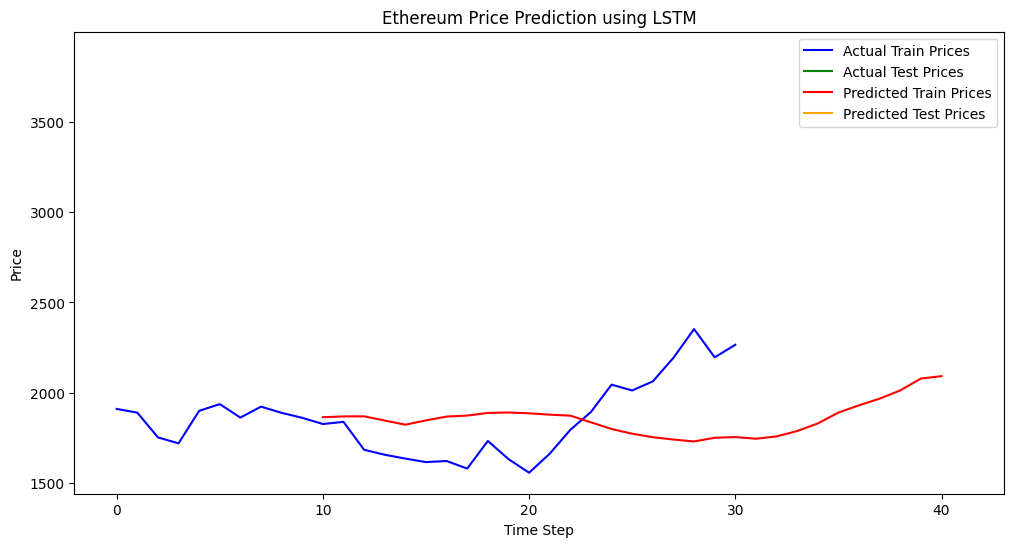

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data

# Use 'close' prices for prediction
prices = data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

# Split data into training and testing sets
train_size = int(len(prices_scaled) * 0.8)
test_size = len(prices_scaled) - train_size
train_data, test_data = prices_scaled[0:train_size], prices_scaled[train_size:len(prices_scaled)]

# Convert data into sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Choose the sequence length (number of time steps)
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build LSTM model
model = Sequential([
    LSTM(50, input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train Prices', color='blue')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test Prices', color='green')
plt.plot(np.arange(seq_length, len(train_predictions) + seq_length), train_predictions, label='Predicted Train Prices', color='red')
plt.plot(np.arange(len(y_train) + seq_length, len(y_train) + len(y_test) + seq_length), test_predictions, label='Predicted Test Prices', color='orange')
plt.title('Ethereum Price Prediction using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()


In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


# Select only 'close' prices for simplicity
prices = data['close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Define parameters
look_back = 30  # Number of previous time steps to use as input features
future_steps = 7  # Number of future time steps to predict

# Prepare data
X, y = [], []
for i in range(len(prices_scaled) - look_back - future_steps + 1):
    X.append(prices_scaled[i:i+look_back])
    y.append(prices_scaled[i+look_back:i+look_back+future_steps])
X, y = np.array(X), np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(future_steps)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Combine X_test and predictions into a DataFrame for easy printing
result_df = pd.DataFrame({'Date': data.loc[data.index[-len(X_test):], 'timestamp'], 'Predicted Ethereum Price': scaler.inverse_transform(predictions[:, 0, None]).flatten()})


result_df = pd.DataFrame({'Date': data.loc[data.index[-len(X_test):], 'timestamp'], 'Predicted Ethereum Price': scaler.inverse_transform(predictions[:, 0, None]).flatten()})

# Add the actual Ethereum prices to the DataFrame
# Add the actual Ethereum prices to the DataFrame
result_df['Actual Ethereum Price'] = scaler.inverse_transform(y_test[:, 0, :].reshape(-1, 1)).flatten()


# Print the predictions along with the actual prices and dates
print("Predicted and Actual Ethereum Prices:")
print(result_df[['Date', 'Predicted Ethereum Price', 'Actual Ethereum Price']])



Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.1397
Epoch 2/50
1/1 [==============================] - 0s 17ms/step - loss: 0.1340
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 0.1284
Epoch 4/50
1/1 [==============================] - 0s 19ms/step - loss: 0.1230
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 0.1177
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 0.1124
Epoch 7/50
1/1 [==============================] - 0s 17ms/step - loss: 0.1070
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 0.1015
Epoch 9/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0959
Epoch 10/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0901
Epoch 11/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0840
Epoch 12/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0775
Epoch 13/50
1/1 [==============================] - 0s 18ms/step

In [55]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test.flatten(), predictions.flatten())
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.018914719828132993


In [55]:
# Calculate R^2 score
r2_score = model.score(X_test, y_test)
print("R^2 Score for Random Forest Regression:", r2_score)
